# Red wine data set

Main goal is to Red wine quality by fixed acidity,volatile acidity,	citric acid,	residual sugar,	chlorides,	free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates,	alcohol as regressors to predict its quality

Data set taken from:https://archive.ics.uci.edu/ml/datasets/Wine+Quality


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # we only need pyplot
#sb.set() # set the default Seaborn style for graphics


In [2]:
# Naming the dataset
data = 'winequality-red.csv'
# Importing the dataset from the CSV file
LEdata = pd.read_csv(data,sep = ';')
# Displaying the imported dataset
LEdata.columns=LEdata.columns.str.strip() #removing all the white blanks in the headings
LEdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Displaying information of the different variables in the dataset
LEdataInfo = LEdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Cleaning & Preprocessing

1) Check for null values
2) Check on its standard deviation
3) check if the data has many outliers
4) Check whether it requires scaling



We need to check is there any null values in the dataframe

In [4]:
#Check 
LEdata.isnull().sum()
#cleaneddata = intnumdata.dropna()
# Display the cleaned dataframe to ensure that all the null entries are removed
#cleaneddata.info()
#cleaneddata.head()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values

### Characteristics of the data

1) Linear or non-linear, so to determine the correct model for regression
2) Whether the data points are very far apart

In [5]:
LEdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check for outliers

<Figure size 3000x3000 with 0 Axes>

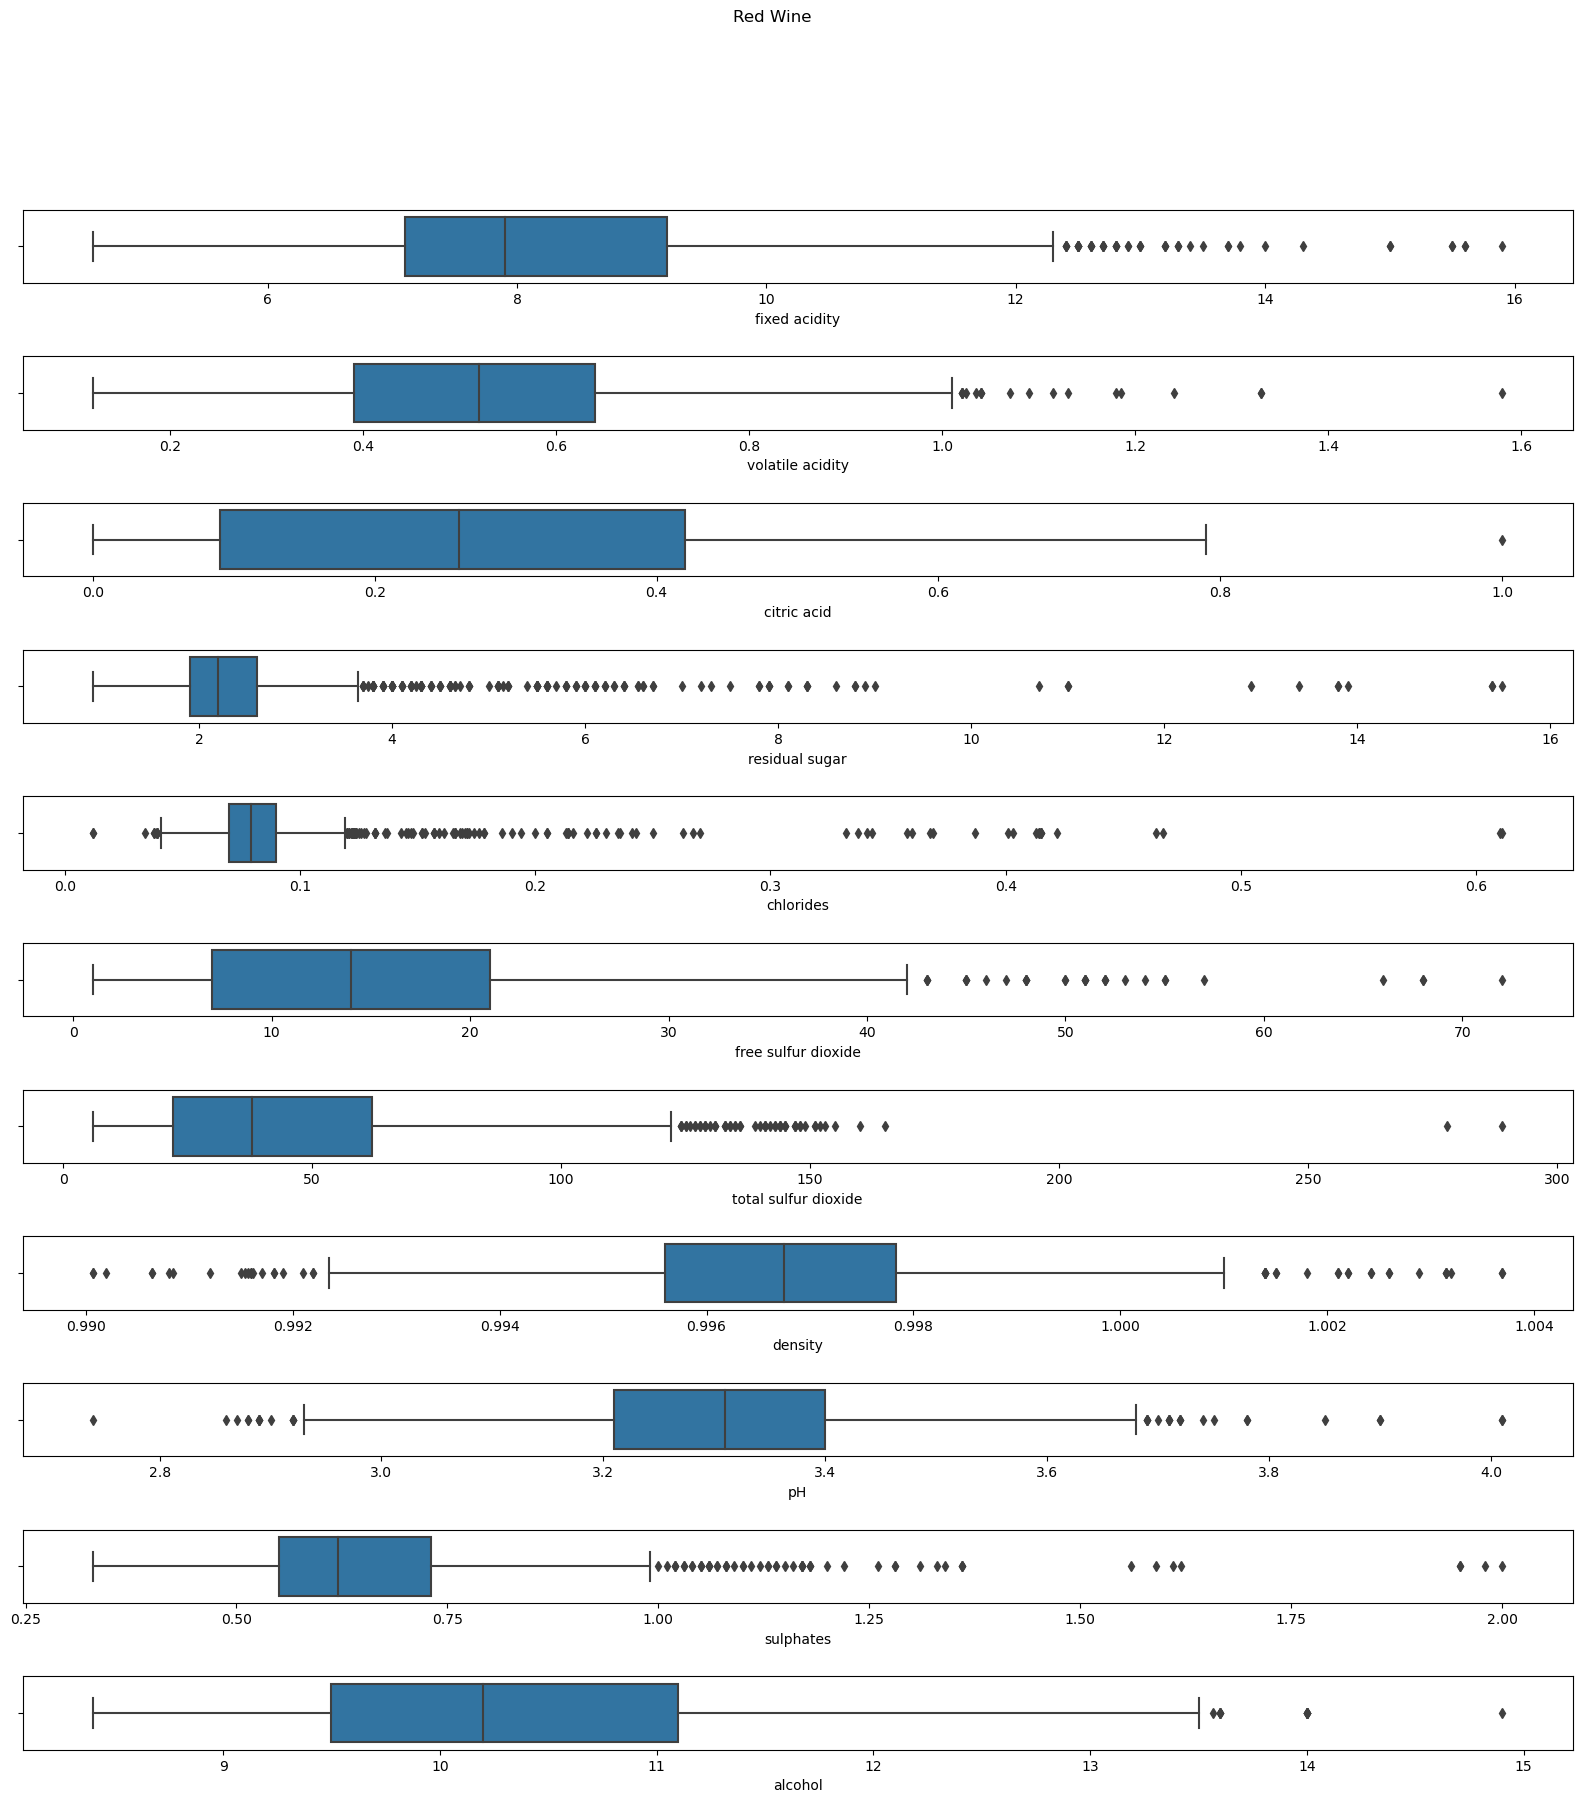

In [52]:
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(11,figsize=(20,20))
fig.suptitle('Red Wine')
plt.subplots_adjust(hspace=1)

sb.boxplot(ax=axes[0], data=LEdata, x='fixed acidity')
sb.boxplot(ax=axes[1], data=LEdata, x='volatile acidity')
sb.boxplot(ax=axes[2], data=LEdata, x='citric acid')
sb.boxplot(ax=axes[3], data=LEdata, x='residual sugar')
sb.boxplot(ax=axes[4], data=LEdata, x='chlorides')
sb.boxplot(ax=axes[5], data=LEdata, x='free sulfur dioxide')
sb.boxplot(ax=axes[6], data=LEdata, x='total sulfur dioxide')
sb.boxplot(ax=axes[7], data=LEdata, x='density')
sb.boxplot(ax=axes[8], data=LEdata, x='pH')
sb.boxplot(ax=axes[9], data=LEdata, x='sulphates')
sb.boxplot(ax=axes[10], data=LEdata, x='alcohol')

plt.show()

Scaling: 
Reference: https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/#:~:text=So%20if%20the%20data%20in,between%20them%20will%20be%20lower.



Should you remove outlier?:
https://statisticsbyjim.com/basics/remove-outliers/
Guidelines for Dealing with Outliers
Sometimes it’s best to keep outliers in your data. They can capture valuable information that is part of your study area. Retaining these points can be hard, particularly when it reduces statistical significance! However, excluding extreme values solely due to their extremeness can distort the results by removing information about the variability inherent in the study area. You’re forcing the subject area to appear less variable than it is in reality.

When considering whether to remove an outlier, you’ll need to evaluate if it appropriately reflects your target population, subject-area, research question, and research methodology. Did anything unusual happen while measuring these observations, such as power failures, abnormal experimental conditions, or anything else out of the norm? Is there anything substantially different about an observation, whether it’s a person, item, or transaction? Did measurement or data entry errors occur?

### For this study

We should not remove the outliers as they are significant to the studies and we assume that no data recording error has occured during the experiment

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

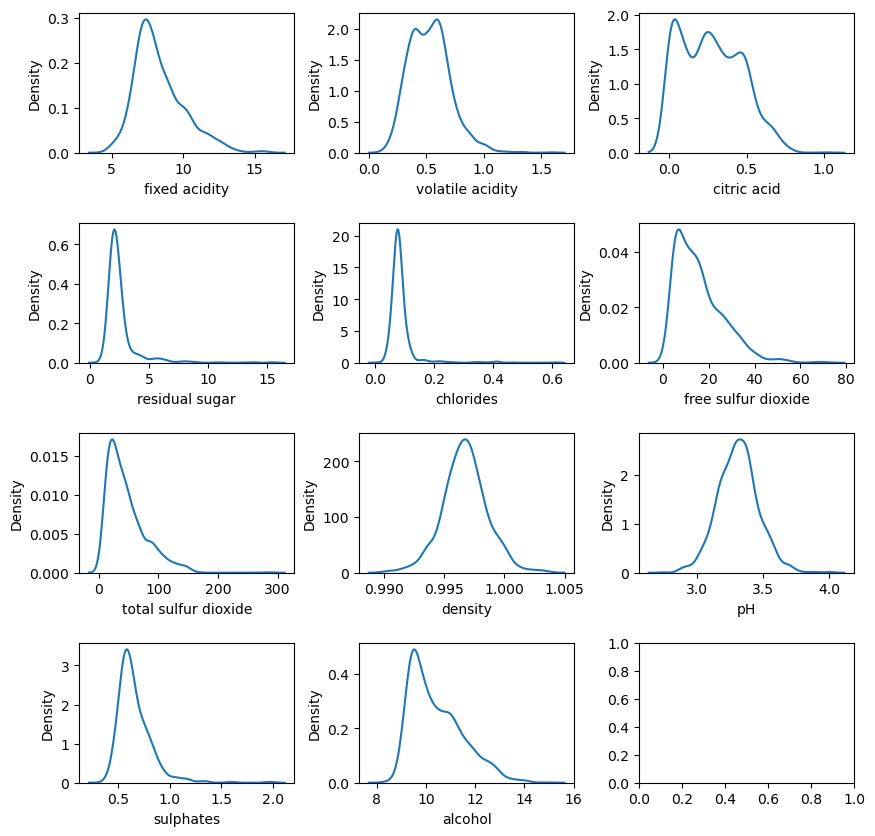

In [8]:
fig, axs = plt.subplots(4,3,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
sb.kdeplot(ax = axs[0,0], data=LEdata, x = 'fixed acidity')
sb.kdeplot(ax = axs[0,1], data=LEdata, x = 'volatile acidity')
sb.kdeplot(ax = axs[0,2], data=LEdata, x = 'citric acid')
sb.kdeplot(ax = axs[1,0], data=LEdata, x = 'residual sugar')
sb.kdeplot(ax = axs[1,1], data=LEdata, x = 'chlorides')
sb.kdeplot(ax = axs[1,2], data=LEdata, x = 'free sulfur dioxide')
sb.kdeplot(ax = axs[2,0], data=LEdata, x = 'total sulfur dioxide')
sb.kdeplot(ax = axs[2,1], data=LEdata, x = 'density')
sb.kdeplot(ax = axs[2,2], data=LEdata, x = 'pH')
sb.kdeplot(ax = axs[3,0], data=LEdata, x = 'sulphates')
sb.kdeplot(ax = axs[3,1], data=LEdata, x = 'alcohol')


fixed acidity, volatile acidity, citric acid, residual sugar, chlorids, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol are skewed

<b>Data is skewed:</b>
https://builtin.com/data-science/skewed-data

But if there’s too much skewness in the data, then many statistical models don’t work effectively. Why is that?

In skewed data, the tail region may act as an outlier for the statistical model, and we know that outliers adversely affect a model’s performance, especially regression-based models.

<b>What do we do?</b>
Removing outliers and normalizing our data will allow us to experiment with more statistical models.

1) Boxcox transformation (only for positive numbers), is a common method to get a more normally distributed curve

2) Check out: https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604

### Assignment of regressors and response variable

In [9]:
# Y = np.array(LEdata['quality'])
# Y = np.reshape(Y,(-1,1))
# X = np.array(LEdata.drop(['quality'],axis=1))
Y = pd.DataFrame()
Y['quality'] = LEdata['quality']
X = LEdata.drop(['quality'],axis = 1)
display(Y)
display(X)
print("Y shape: ", Y.shape)
print("X shape: ", X.shape)


,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Y shape:  (1599, 1)
X shape:  (1599, 11)


### Data Splitting
60% of dataset would be used to train the model, 40% for cross validation of the model

In [148]:
#Data splitting first before scaling, as it prevents data leakage:
#https://machinelearningmastery.com/data-preparation-without-data-leakage/
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=1,shuffle = True)

print(X_train.info())
print(Y_train.info())
print(X_test.info())
print(Y_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 1036 to 1061
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         959 non-null    float64
 1   volatile acidity      959 non-null    float64
 2   citric acid           959 non-null    float64
 3   residual sugar        959 non-null    float64
 4   chlorides             959 non-null    float64
 5   free sulfur dioxide   959 non-null    float64
 6   total sulfur dioxide  959 non-null    float64
 7   density               959 non-null    float64
 8   pH                    959 non-null    float64
 9   sulphates             959 non-null    float64
 10  alcohol               959 non-null    float64
dtypes: float64(11)
memory usage: 89.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 1036 to 1061
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 

### Linear Regression

Since most of the parameters has numbers between 0 to 1, adding 3 to all parameters allow us to use box cox transformation for linear regression.

### Using adjusted R^2 to find the variable that is significant to the prediction of Y

In [20]:
from sklearn.feature_selection import mutual_info_regression
#https://builtin.com/data-science/adjusted-r-squared
mutual_info = mutual_info_regression(X,Y.values.ravel(), discrete_features=X.dtypes == np.int32)
mutual_info = pd.Series(mutual_info, index = X.columns)
mutual_info.sort_values(ascending =  False, inplace = True)
print(mutual_info)
print(Y.columns)

alcohol                 0.181583
sulphates               0.121858
volatile acidity        0.087914
total sulfur dioxide    0.087618
density                 0.078419
citric acid             0.051881
chlorides               0.047251
residual sugar          0.046384
pH                      0.033212
fixed acidity           0.031579
free sulfur dioxide     0.002542
dtype: float64
Index(['quality'], dtype='object')


Its shows that alcohol has the highest correlation with Quality

In [21]:

X_train.iloc[:, :1]

,fixed acidity
1036,7.6
616,9.6
370,6.9
1053,8.3
664,12.1
...,...
715,7.2
905,9.2
1096,6.6
235,7.2


In [54]:
from sklearn.metrics import r2_score\
#https://builtin.com/data-science/adjusted-r-squared
#https://statisticsbyjim.com/regression/interpret-adjusted-r-squared-predicted-r-squared-regression/
result_df = pd.DataFrame()
for i in range(1, len(mutual_info) + 1):
    X_tr = X_train.iloc[:, :i].copy()
    X_te = X_test.iloc[:, :i].copy()
    model1 = LinearRegression()
    model1.fit(X_tr,Y_train)
    
    Prediction1 = model1.predict(X_tr)
    R1 = r2_score(y_true= Y_train,y_pred = Prediction1)
    Prediction2 = model1.predict(X_te)
    R2 = r2_score(y_true= Y_test,y_pred = Prediction2)
    adj_r2_train = 1 - ((1 - R1) * (len(X_tr) - 1) / (len(X_tr) - i - 1))
    adj_r2_test = 1 - ((1 - R2) * (len(X_te) - 1) / (len(X_te) - i - 1))
    
    result_df = result_df.append(pd.DataFrame({'r2_train': R1,'r2_test':R2,
                                              'adj_r2_train': adj_r2_train, 'adj_r2_test': adj_r2_test}, index=[i]))

result_df

C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\3613220296.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2_train': R1,'r2_test':R2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\3613220296.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2_train': R1,'r2_test':R2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\3613220296.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(pd.DataFrame({'r2_train': R1,'r2_test':R2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\3613220296.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U

,r2_train,r2_test,adj_r2_train,adj_r2_test
1,0.015095,0.015686,0.014065,0.014143
2,0.174847,0.115424,0.173120,0.112647
3,0.175143,0.114645,0.172552,0.110469
4,0.175277,0.114797,0.171819,0.109221
5,0.186291,0.129599,0.182021,0.122735
6,0.188238,0.133614,0.183122,0.125402
7,0.218688,0.159971,0.212937,0.150667
8,0.282924,0.209990,0.276885,0.199974
9,0.289626,0.217210,0.282889,0.206028
10,0.333974,0.284147,0.326948,0.272767


Looking at the adjusted R^2, it dropped when variable 2,3,4 is added, thus we might want to remove it. 

https://desktop.arcgis.com/en/arcmap/10.7/tools/spatial-statistics-toolbox/what-they-don-t-tell-you-about-regression-analysis.htm#:~:text=Typically%20you%20will%20remove%20explanatory,if%20it's%20not%20statistically%20significant :

Typically you will remove explanatory variables from your model if they are not statistically significant(variables that dropped the R^2 adjusted). However, if theory indicates a variable is very important, or if a particular variable is the focus of your analysis, you might retain it even if it's not statistically significant.

We are unable to remove any variables as theoretically they are important in determining a wine's quality.

### Using residual analysis to show that the data is not suitable to use linear regression

,Residual
75,-0.549389
1283,0.641938
408,-0.111204
1281,0.267313
1118,-0.682381
...,...
1584,0.594710
730,0.126753
1026,-0.482239
1244,0.168668


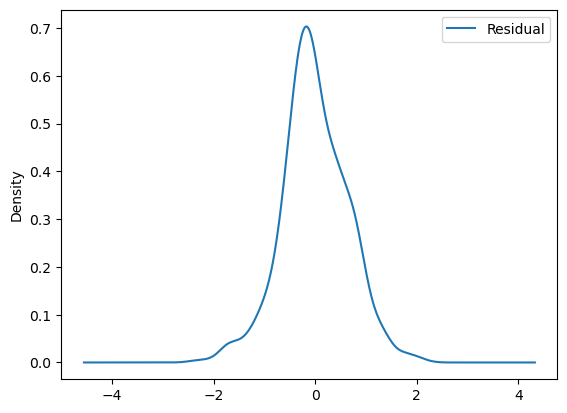

In [177]:
# https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd#:~:text=The%20answer%20is%20no!,is%20just%20the%20prediction%20error.

Y_pred = model1.predict(X_test)
Residual = Y_test - Y_pred
Residual['Residual'] = Residual['quality']
Residual = Residual.drop(['quality'], axis=1)
display(Residual)
ax = Residual.plot.kde()

This shows that with the untransformed data is not suitable to be used in linear regression, as the residual is not normally distributed

In [36]:
SSE = np.sum((Y_test - Y_pred)**2)
print(SSE)

MSE = SSE/len(Y_test)
print(MSE)

quality    265.943449
dtype: float64
quality    0.415537
dtype: float64


In [134]:
from scipy import stats
X_copy = X.copy()
No_of_variable = len(X_copy.columns)
#X.values.ravel()
# NEED TO CHANGE ALL SMALL NUMBERS (0 to 1)
Num_row = len(X_copy)

for i in range (Num_row):
    X_copy.iloc[i] = X_copy.iloc[i] + 3
X_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,10.4,3.700,3.00,4.9,3.076,14.0,37.0,3.99780,6.51,3.56,12.4
1,10.8,3.880,3.00,5.6,3.098,28.0,70.0,3.99680,6.20,3.68,12.8
2,10.8,3.760,3.04,5.3,3.092,18.0,57.0,3.99700,6.26,3.65,12.8
3,14.2,3.280,3.56,4.9,3.075,20.0,63.0,3.99800,6.16,3.58,12.8
4,10.4,3.700,3.00,4.9,3.076,14.0,37.0,3.99780,6.51,3.56,12.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,9.2,3.600,3.08,5.0,3.090,35.0,47.0,3.99490,6.45,3.58,13.5
1595,8.9,3.550,3.10,5.2,3.062,42.0,54.0,3.99512,6.52,3.76,14.2
1596,9.3,3.510,3.13,5.3,3.076,32.0,43.0,3.99574,6.42,3.75,14.0
1597,8.9,3.645,3.12,5.0,3.075,35.0,47.0,3.99547,6.57,3.71,13.2


In [135]:
#Extract every column
Columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", 
           "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

X_boxdf = pd.DataFrame()


for i in range(No_of_variable):
    #extract the column
    

    new_df1 = X_copy.loc[:,Columns[i]]

    #flatten it to 1D
    A = new_df1.values.ravel()

    #boxcox it
    X_box1, fitted_lambda1 = stats.boxcox(A)

    print(fitted_lambda1)

    #put them into a dataframe
    df1 = pd.DataFrame (X_box1, columns = [Columns[i]])

    #append each column in a dataframe
    X_boxdf = pd.concat([X_boxdf,df1],axis =1) 

    
display(X_boxdf)



-1.2808352826060976
-3.0389269911455097
-2.071894913727002
-3.622972137294239
-52.8909558522362
-0.05845316358499081
-0.027643045279552688
-35.952387434653616
-1.0120758748197503
-9.792645253707036
-4.498155237601198


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.741849,0.322890,0.433095,0.275145,0.018907,2.445580,3.436552,0.027815,0.839686,0.102117,0.222311
1,0.743684,0.323720,0.433095,0.275479,0.018907,3.027767,4.008507,0.027815,0.832175,0.102117,0.222311
2,0.743684,0.323184,0.434436,0.275360,0.018907,2.659395,3.825308,0.027815,0.833687,0.102117,0.222311
3,0.754642,0.320160,0.447889,0.275145,0.018907,2.748103,3.914684,0.027815,0.831151,0.102117,0.222311
4,0.741849,0.322890,0.433095,0.275145,0.018907,2.445580,3.436552,0.027815,0.839686,0.102117,0.222311
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.735236,0.322354,0.435725,0.275206,0.018907,3.210226,3.652342,0.027815,0.838289,0.102117,0.222312
1595,0.733262,0.322062,0.436350,0.275314,0.018907,3.357548,3.776922,0.027815,0.839917,0.102117,0.222312
1596,0.735862,0.321817,0.437265,0.275360,0.018907,3.137238,3.572276,0.027815,0.837581,0.102117,0.222312
1597,0.733262,0.322602,0.436963,0.275206,0.018907,3.210226,3.652342,0.027815,0.841058,0.102117,0.222311


C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

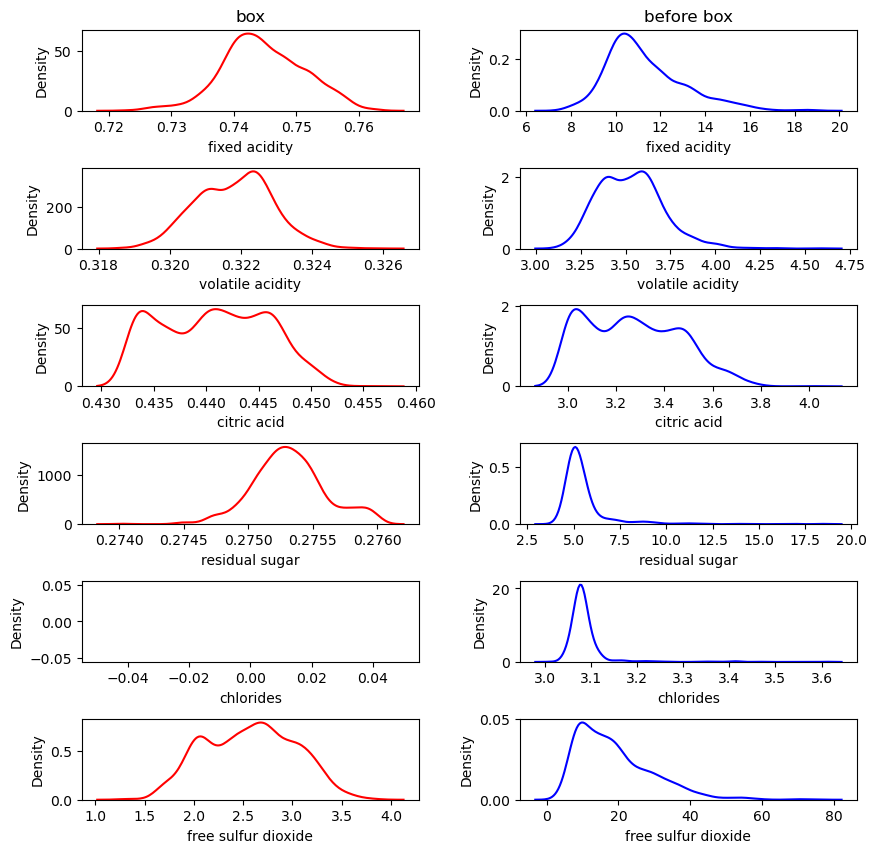

In [136]:
fig, axs = plt.subplots(6,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
Data = X_boxdf
sb.kdeplot(ax = axs[0,0], data=Data, x = 'fixed acidity',color = 'red',label = 'log' )
sb.kdeplot(ax = axs[0,1], data=X_copy, x = 'fixed acidity',color = 'blue', label = 'before box')
axs[0, 0].set_title("box")
axs[0, 1].set_title("before box")

sb.kdeplot(ax = axs[1,0], data=Data, x = 'volatile acidity', label = 'log', color = 'red')
sb.kdeplot(ax = axs[1,1], data=X_copy, x = 'volatile acidity',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[2,0], data=Data, x = 'citric acid', label = 'log' , color = 'red')
sb.kdeplot(ax = axs[2,1], data=X_copy, x = 'citric acid',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[3,0], data=Data, x = 'residual sugar',color = 'red', label = 'log')
sb.kdeplot(ax = axs[3,1], data=X_copy, x = 'residual sugar',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[4,0], data=Data, x = 'chlorides', color = 'red', label = 'log')
sb.kdeplot(ax = axs[4,1], data=X_copy, x = 'chlorides',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[5,0], data=Data, x = 'free sulfur dioxide', color = 'red' , label = 'log')
sb.kdeplot(ax = axs[5,1], data=X_copy, x = 'free sulfur dioxide',color = 'blue', label = 'before box')

C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

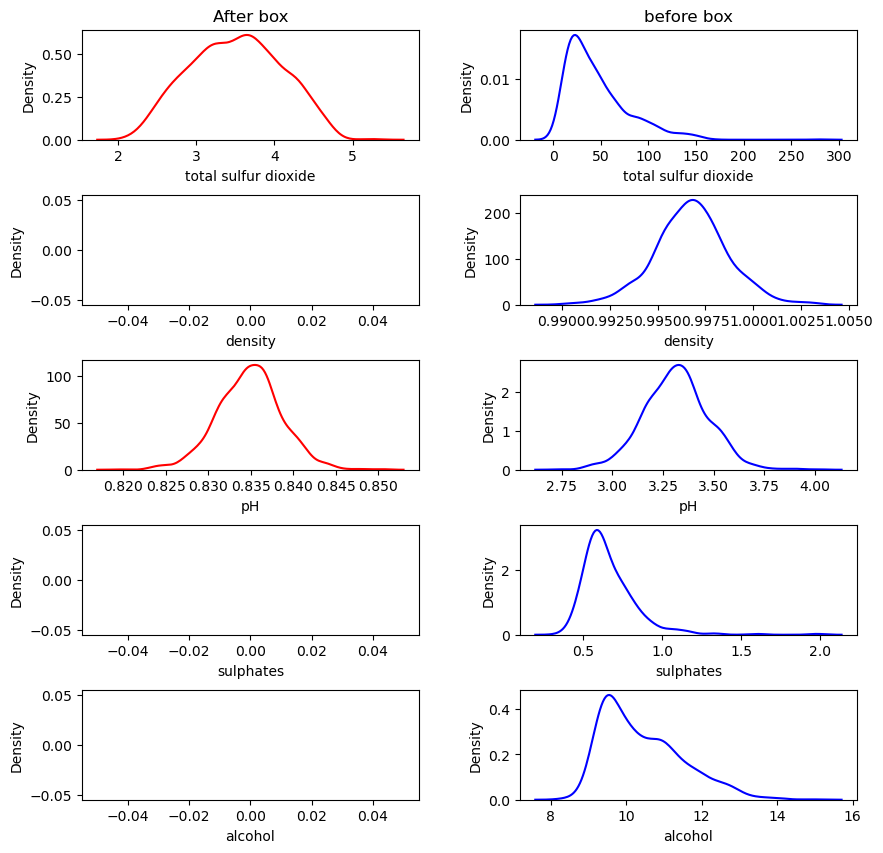

In [122]:
fig, axs = plt.subplots(5,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)
Data = X_boxdf

sb.kdeplot(ax = axs[0,0], data=Data, x = 'total sulfur dioxide', color = 'red' , label = 'log')
sb.kdeplot(ax = axs[0,1], data=X_train, x = 'total sulfur dioxide',color = 'blue', label = 'before box')
axs[0, 0].set_title("After box")
axs[0, 1].set_title("before box")

sb.kdeplot(ax = axs[1,0], data=Data, x = 'density' , color = 'red', label = 'log')
sb.kdeplot(ax = axs[1,1], data=X_train, x = 'density',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[2,0], data=Data, x = 'pH', color = 'red' , label = 'log')
sb.kdeplot(ax = axs[2,1], data=X_train, x = 'pH',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[3,0], data=Data, x = 'sulphates', color = 'red', label = 'log')
sb.kdeplot(ax = axs[3,1], data=X_train, x = 'sulphates',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[4,0], data=Data, x = 'alcohol', color = 'red', label = 'log')
sb.kdeplot(ax = axs[4,1], data=X_train, x = 'alcohol',color = 'blue', label = 'before box')

#### No values could be seen after box for chlorides,density,sulphates,alcohol, might be due to lamda
#### Density might not to be transformed as it already has normal distribution

,chlorides,sulphates,alcohol
0,-0.0005,-18010.838230,-30.005424
1,-0.0005,-18010.738878,-30.005278
2,-0.0005,-18010.760497,-30.005278
3,-0.0005,-18010.819098,-30.005278
4,-0.0005,-18010.838230,-30.005424
...,...,...,...
1594,-0.0005,-18010.819098,-30.005075
1595,-0.0005,-18010.689686,-30.004922
1596,-0.0005,-18010.695231,-30.004962
1597,-0.0005,-18010.719080,-30.005155


C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

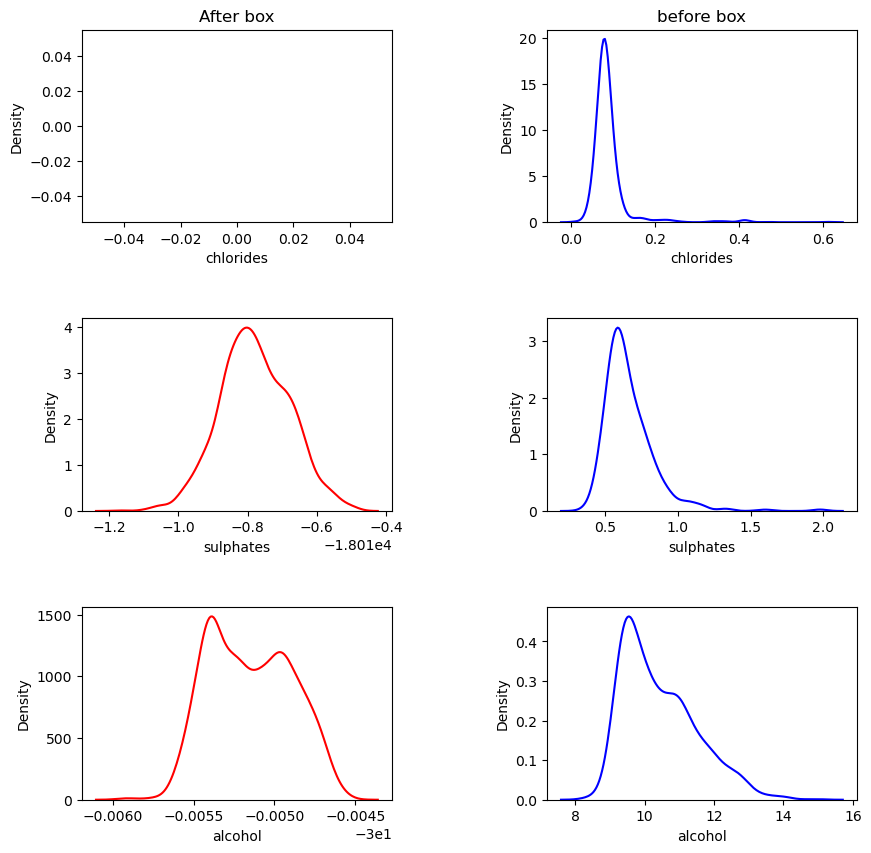

In [137]:
#Current lamda for training Chlorides:-51.29765249530617 
#Density: -10.549758693816631
#sulphates:-9.559528837307447
#alcohol:-4.2188919493230825 

chlorides = X_boxdf[["chlorides"]]
    #flatten it to 1D
A = chlorides.values.ravel()
    #boxcox it
X_chloride = stats.boxcox(A, lmbda =2000)
#print(X_chloride)
df1 = pd.DataFrame (X_chloride, columns = ['chlorides'])

sulphates = X_boxdf[["sulphates"]]

    #flatten it to 1D
C = sulphates.values.ravel()
    #boxcox it
X_sulphates = stats.boxcox(C, lmbda = -5)

#print(X_sulphates )
df3 = pd.DataFrame (X_sulphates, columns = ['sulphates'])

alcohol = X_boxdf[["alcohol"]]
    #flatten it to 1D
d = alcohol.values.ravel()
    #boxcox it
X_alcohol = stats.boxcox(d, lmbda = -3)
#print(X_chloride)
df4 = pd.DataFrame (X_alcohol, columns = ['alcohol'])
A
df_train_box_various = pd.concat([df1,df3,df4],axis = 1)
display(df_train_box_various)

fig, axs = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
sb.kdeplot(ax = axs[0,0], data=df1, x = 'chlorides', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[0,1], data=X_train, x = 'chlorides',color = 'blue', label = 'Before Box')
axs[0, 0].set_title("After box")
axs[0, 1].set_title("before box")


sb.kdeplot(ax = axs[1,0], data=df3, x = 'sulphates', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[1,1], data=X_train, x = 'sulphates',color = 'blue', label = 'Before Box')

sb.kdeplot(ax = axs[2,0], data=df4, x = 'alcohol', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[2,1], data=X_train, x = 'alcohol',color = 'blue', label = 'Before Box')

After changing lambda numbers, chlorides is still unable to transform close to normal distribution as there are high number of outliers.

For the rest it could similarly shaped like the normal distribution.

### try to fit in variables that has changed lambda for model training, and hope the residual follows normal distribution and R^2 increase

C:\Users\Darie\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

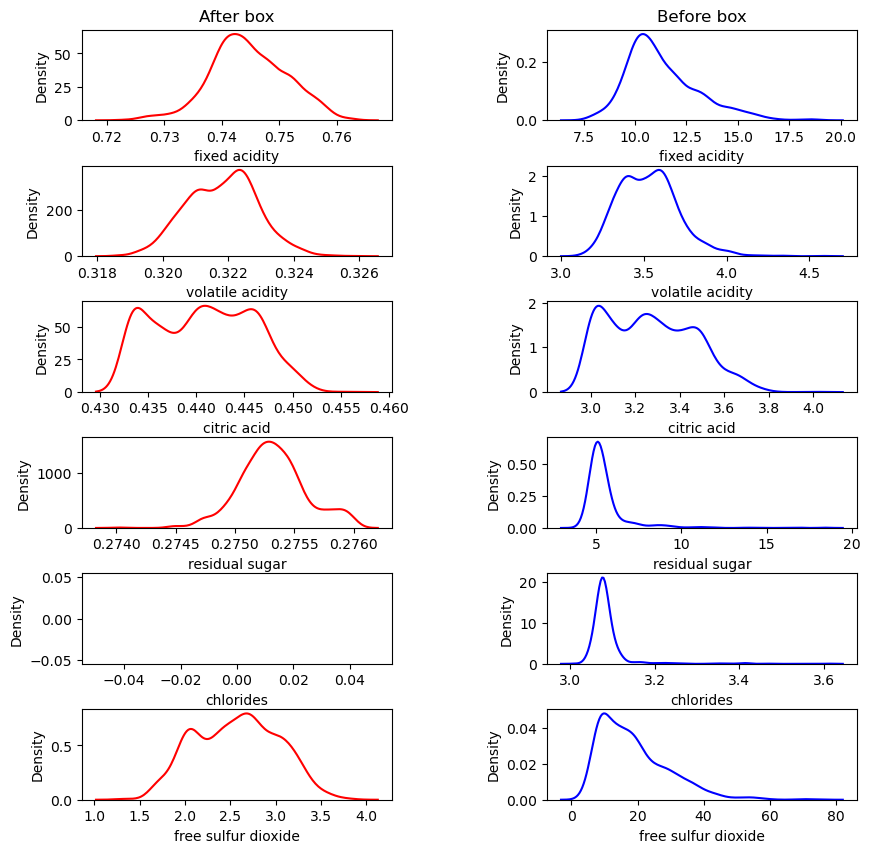

In [138]:
#COMBINING OF ALL THE GRAPH PLOTS for training data
fig, axs = plt.subplots(6,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
Data = X_boxdf
sb.kdeplot(ax = axs[0,0], data=Data, x = 'fixed acidity',color = 'red',label = 'box' )
sb.kdeplot(ax = axs[0,1], data=X_copy, x = 'fixed acidity',color = 'blue', label = 'before box')
axs[0, 0].set_title("After box")
axs[0, 1].set_title("Before box")

sb.kdeplot(ax = axs[1,0], data=Data, x = 'volatile acidity', label = 'box', color = 'red')
sb.kdeplot(ax = axs[1,1], data=X_copy, x = 'volatile acidity',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[2,0], data=Data, x = 'citric acid', label = 'box' , color = 'red')
sb.kdeplot(ax = axs[2,1], data=X_copy, x = 'citric acid',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[3,0], data=Data, x = 'residual sugar',color = 'red', label = 'box')
sb.kdeplot(ax = axs[3,1], data=X_copy, x = 'residual sugar',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[4,0], data=df1, x = 'chlorides', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[4,1], data=X_copy, x = 'chlorides',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[5,0], data=Data, x = 'free sulfur dioxide', color = 'red' , label = 'box')
sb.kdeplot(ax = axs[5,1], data=X_copy, x = 'free sulfur dioxide',color = 'blue', label = 'before box')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

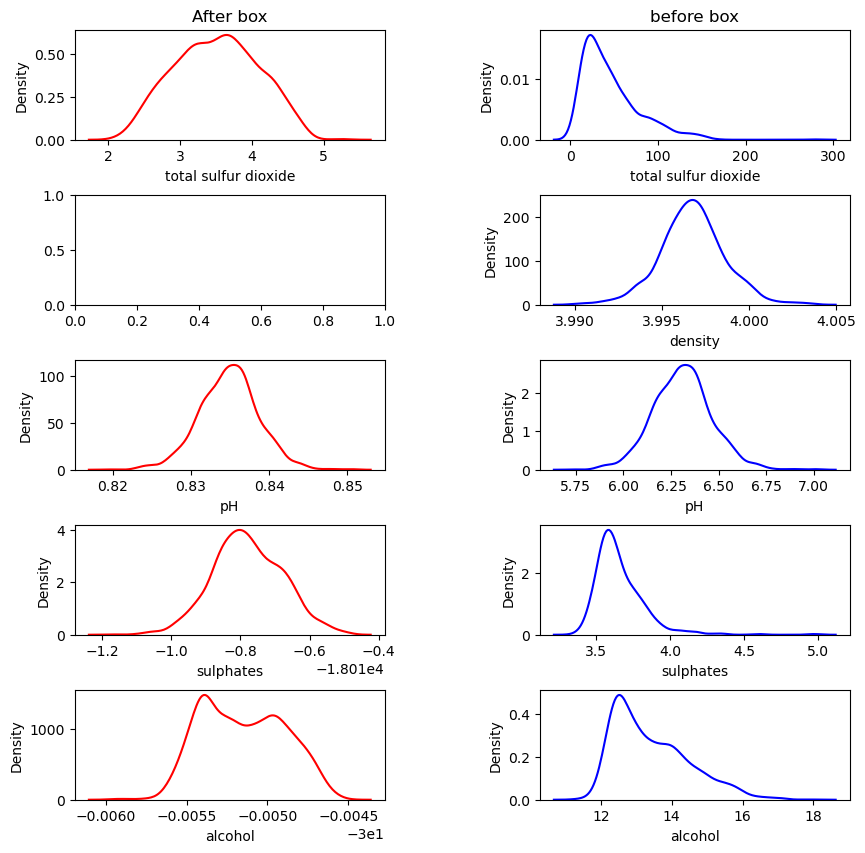

In [147]:
fig, axs = plt.subplots(5,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
Data = X_boxdf

sb.kdeplot(ax = axs[0,0], data=Data, x = 'total sulfur dioxide', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[0,1], data=X_train, x = 'total sulfur dioxide',color = 'blue', label = 'before box')
axs[0, 0].set_title("After box")
axs[0, 1].set_title("before box")

sb.kdeplot(ax = axs[1,1], data=X_copy, x = 'density',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[2,0], data=Data, x = 'pH', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[2,1], data=X_copy, x = 'pH',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[3,0], data=df3, x = 'sulphates', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[3,1], data=X_copy, x = 'sulphates',color = 'blue', label = 'before box')

sb.kdeplot(ax = axs[4,0], data=df4, x = 'alcohol', color = 'red' , label = 'After Box')
sb.kdeplot(ax = axs[4,1], data=X_copy, x = 'alcohol',color = 'blue', label = 'before box')

### Inserting manually adjusted lambda columns into the main boxcox dataset

In [141]:
Various_column = ['sulphates','alcohol']


for i in range(2):
    #extract the column
    X_boxdf[Various_column[i]] = df_train_box_various[Various_column[i]]
    #X_test_boxdf[Various_column[i]] = df_test_box_various[Various_column[i]]
#     new_df1 = X_train_box.loc[:,Various_column[i]]
#     new_df2 = X_test_box.loc[:,Various_column[i]]

X_boxdf['chlorides'] = X_copy['chlorides']
X_boxdf['density'] = X_copy['density']
#display(df_train_box_various)
display(X_boxdf)

# display(df_test_box_various)
# display(X_test_boxdf)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.741849,0.322890,0.433095,0.275145,3.076,2.445580,3.436552,3.99780,0.839686,-18010.838230,-30.005424
1,0.743684,0.323720,0.433095,0.275479,3.098,3.027767,4.008507,3.99680,0.832175,-18010.738878,-30.005278
2,0.743684,0.323184,0.434436,0.275360,3.092,2.659395,3.825308,3.99700,0.833687,-18010.760497,-30.005278
3,0.754642,0.320160,0.447889,0.275145,3.075,2.748103,3.914684,3.99800,0.831151,-18010.819098,-30.005278
4,0.741849,0.322890,0.433095,0.275145,3.076,2.445580,3.436552,3.99780,0.839686,-18010.838230,-30.005424
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.735236,0.322354,0.435725,0.275206,3.090,3.210226,3.652342,3.99490,0.838289,-18010.819098,-30.005075
1595,0.733262,0.322062,0.436350,0.275314,3.062,3.357548,3.776922,3.99512,0.839917,-18010.689686,-30.004922
1596,0.735862,0.321817,0.437265,0.275360,3.076,3.137238,3.572276,3.99574,0.837581,-18010.695231,-30.004962
1597,0.733262,0.322602,0.436963,0.275206,3.075,3.210226,3.652342,3.99547,0.841058,-18010.719080,-30.005155


In [127]:
X_train_box, X_test_box, Y_train, Y_test = train_test_split(X_boxdf,Y,test_size = 0.4,random_state=1,shuffle = True)
display(X_train_box)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1036,0.742786,0.320403,0.442978,0.275443,3.082,3.056618,3.460678,3.99356,0.832683,-18010.809956,-30.004728
616,0.750324,0.322354,0.446643,0.275360,3.079,3.111287,4.057881,3.99970,0.839455,-18010.828519,-30.005312
370,0.739316,0.323208,0.433773,0.275360,3.063,3.276872,3.956144,3.99750,0.841058,-18010.679063,-30.005245
1053,0.745771,0.320560,0.444877,0.275360,3.070,2.312869,3.003453,3.99426,0.836626,-18010.684299,-30.004706
664,0.756618,0.321081,0.447066,0.275206,3.092,2.659395,3.825308,4.00000,0.827726,-18010.753077,-30.005155
...,...,...,...,...,...,...,...,...,...,...,...
715,0.740870,0.321690,0.438731,0.275512,3.069,2.559578,3.436552,3.99670,0.834433,-18010.927571,-30.005507
905,0.749041,0.322239,0.439297,0.275598,3.081,2.659395,4.469499,3.99800,0.832935,-18010.809956,-30.005385
1096,0.737650,0.323015,0.436039,0.275898,3.117,2.312869,2.875046,3.99655,0.835902,-18010.915165,-30.005004
235,0.740870,0.322521,0.433095,0.275145,3.097,2.611041,3.529323,3.99675,0.836385,-18010.819098,-30.005598


In [130]:
mutual_info1 = mutual_info_regression(X_boxdf,Y.values.ravel(), discrete_features=X.dtypes == np.int32)
mutual_info1 = pd.Series(mutual_info, index = X.columns)
mutual_info1.sort_values(ascending =  False, inplace = True)
print(mutual_info1)
print(Y_train.columns)

alcohol                 0.181583
sulphates               0.121858
volatile acidity        0.087914
total sulfur dioxide    0.087618
density                 0.078419
citric acid             0.051881
chlorides               0.047251
residual sugar          0.046384
pH                      0.033212
fixed acidity           0.031579
free sulfur dioxide     0.002542
dtype: float64
Index(['quality'], dtype='object')


In [128]:
result_df1 = pd.DataFrame()
# X_tr1 = X_train_boxdf.iloc[:, :1]
# display(X_tr)
# model2 = LinearRegression()
# model2.fit(X_tr1,Y_train)
# Prediction3 = model2.predict(X_tr1)
# R1_1 = r2_score(y_true= Y_train,y_pred = Prediction2)
# display(R1_1)
for k in range(1,len(mutual_info1)+1):
    X_tr1 = X_train_box.iloc[:, :k]
    X_te1 = X_test_box.iloc[:, :k]
    model2 = LinearRegression()
    model2.fit(X_tr1,Y_train)
    
    Prediction3 = model2.predict(X_tr1)
    R1_1 = r2_score(y_true= Y_train,y_pred = Prediction3)
    Prediction4 = model2.predict(X_te1)
    R2_2 = r2_score(y_true= Y_test,y_pred = Prediction4)
    adj_r2_train_1 = 1 - ((1 - R1_1) * (len(X_tr1) - 1) / (len(X_tr1) - k - 1))
    adj_r2_test_1 = 1 - ((1 - R2_2) * (len(X_te1) - 1) / (len(X_te1) - k - 1))
    
    result_df1 = result_df1.append(pd.DataFrame({'r2_train': R1_1,'r2_test':R2_2,
                                              'adj_r2_train': adj_r2_train_1, 'adj_r2_test': adj_r2_test_1}, index=[k]))
    

result_df1

C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\2046041909.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(pd.DataFrame({'r2_train': R1_1,'r2_test':R2_2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\2046041909.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(pd.DataFrame({'r2_train': R1_1,'r2_test':R2_2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\2046041909.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df1 = result_df1.append(pd.DataFrame({'r2_train': R1_1,'r2_test':R2_2,
C:\Users\Darie\AppData\Local\Temp\ipykernel_21500\2046041909.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,r2_train,r2_test,adj_r2_train,adj_r2_test
1,0.011590,0.010145,0.010558,0.008593
2,0.173559,0.123018,0.171830,0.120264
3,0.174067,0.122216,0.171473,0.118076
4,0.176299,0.125478,0.172846,0.119970
5,0.185847,0.137337,0.181575,0.130534
6,0.186622,0.140751,0.181496,0.132607
7,0.220515,0.165534,0.214778,0.156291
8,0.278251,0.206513,0.272174,0.196453
9,0.283962,0.210200,0.277171,0.198917
10,0.367415,0.306633,0.360742,0.295610


After transforming, it has minimal improvement in r^2 value and also has shown overfitting

       quality
75   -0.532467
1283  0.523328
408  -0.265899
1281  0.226776
1118 -0.430654
...        ...
1584  0.528635
730   0.065390
1026 -0.347238
1244  0.393802
284  -0.540667

[640 rows x 1 columns]


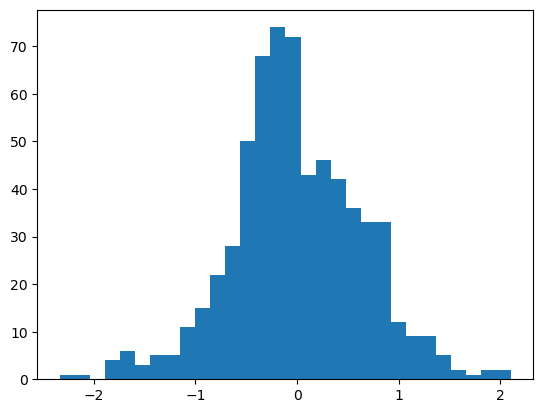

quality    264.419124
dtype: float64
quality    0.413155
dtype: float64


In [164]:
model2 = LinearRegression()
model2.fit(X_train_box,Y_train)

Y_pred_box = model2.predict(X_test_box)
Residual1 = Y_test - Y_pred_box
print(Residual1)
plt.hist(Residual, bins = 30)
plt.show()

SSE1 = np.sum((Y_test - Y_pred_box)**2)
print(SSE1)

MSE1 = SSE1/len(Y_test)
print(MSE1)

## Gaussian Process Regression


In [161]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF, RationalQuadratic, ExpSineSquared
#https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-prior-posterior-py
''' Try out different kernels, adjust alpha'''
kernel1 = DotProduct() +WhiteKernel()+ RationalQuadratic()
kernel2 = WhiteKernel()+ RationalQuadratic()
kernel3 = WhiteKernel()+ DotProduct()
#adding two kernels can be thought of as an OR operation. That is, if you add together two kernels, then the resulting kernel will have high value if either of the two base kernels have a high value.
model2 = GaussianProcessRegressor(kernel = kernel1)
model2.fit(X_train,Y_train.values.ravel())
print(model2.score(X_test,Y_test.values.ravel()))


0.4388773619444185


In [156]:
Y_pred2 = model2.predict(X_test)
Y_pred2df = pd.DataFrame(Y_pred2,columns = ['quality'])

#print(Y_pred2)
#type(Y_testnp2)
SSE2 = np.sum((Y_test - Y_pred2df)**2)
print(SSE2)

MSE2 = SSE/len(Y_test)
print(MSE2)

quality    205.726061
dtype: float64
quality    0.321447
dtype: float64
